<a href="https://colab.research.google.com/github/wasjediknight/rocketseat/blob/main/Exercicio04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import shapiro, kstest, zscore
import statsmodels.api as sm

# Dados simulados com a nova variável
df = pd.DataFrame({
    'Horas de Irrigação': list(range(1, 300)),
    'Área Irrigada': [i * 100 for i in range(1, 300)],
    'Área Irrigada por Ângulo': [i * 100 / 1.5 for i in range(1, 300)]
})

df.to_csv('dados_de_irrigacao.csv', index=False)

# Exibir o DataFrame
df.head()


,Horas de Irrigação,Área Irrigada,Área Irrigada por Ângulo
0,1,100,66.666667
1,2,200,133.333333
2,3,300,200.000000
3,4,400,266.666667
4,5,500,333.333333


# EDA

       Horas de Irrigação  Área Irrigada  Área Irrigada por Ângulo
count          299.000000     299.000000                299.000000
mean           150.000000   15000.000000              10000.000000
std             86.458082    8645.808233               5763.872155
min              1.000000     100.000000                 66.666667
25%             75.500000    7550.000000               5033.333333
50%            150.000000   15000.000000              10000.000000
75%            224.500000   22450.000000              14966.666667
max            299.000000   29900.000000              19933.333333


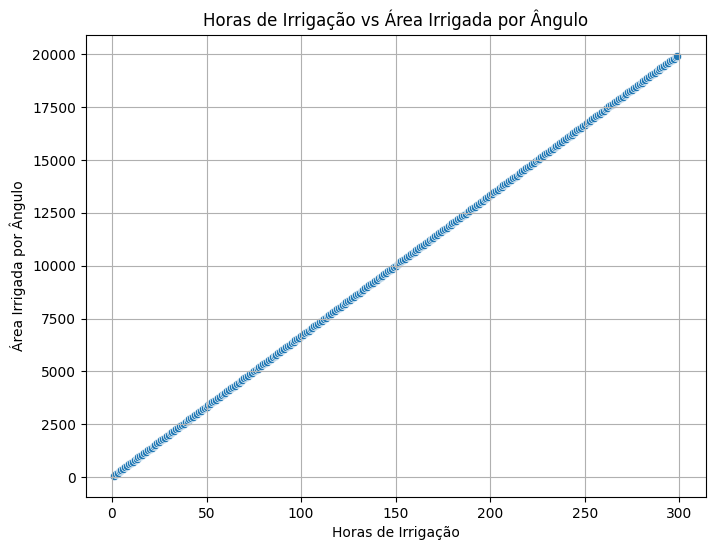

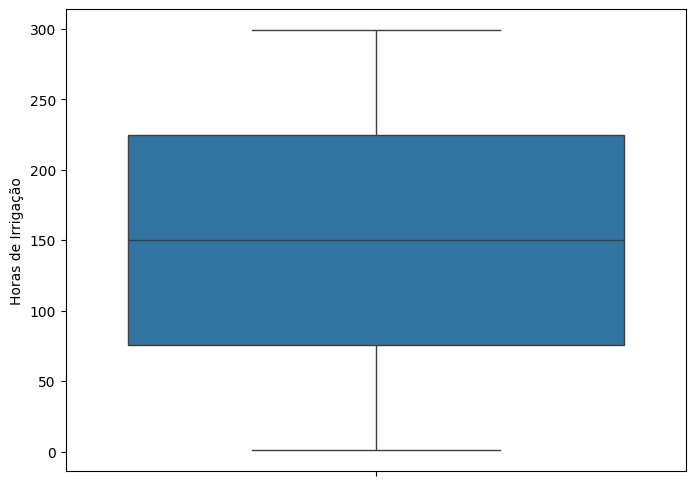

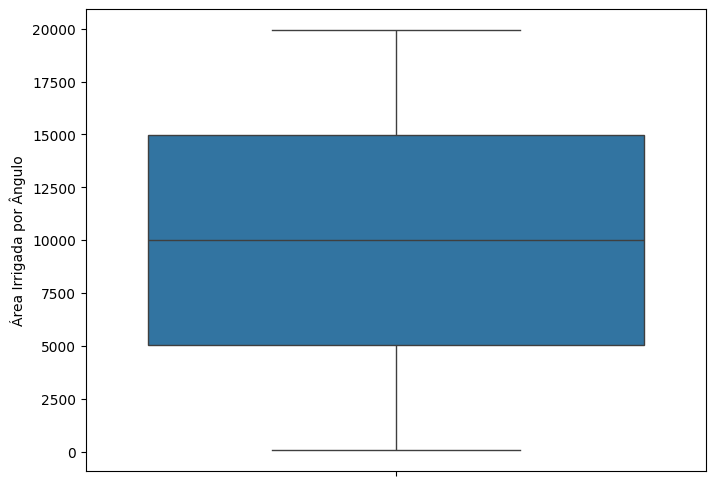

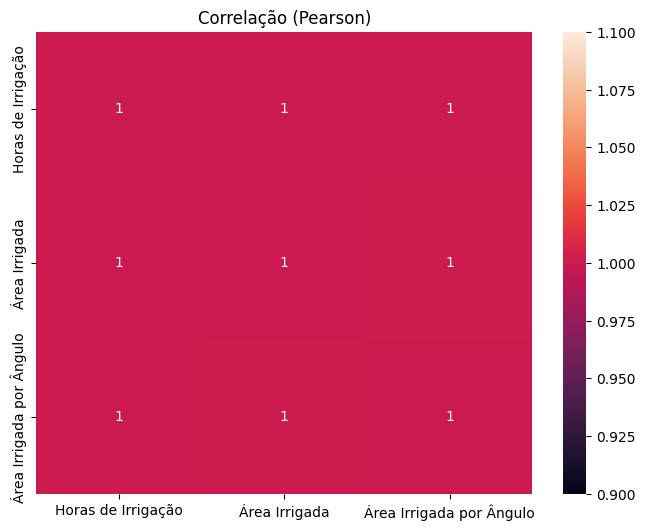

In [2]:
# Estatísticas descritivas
print(df.describe())

# Gráfico de dispersão
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Horas de Irrigação', y='Área Irrigada por Ângulo')
plt.title('Horas de Irrigação vs Área Irrigada por Ângulo')
plt.xlabel('Horas de Irrigação')
plt.ylabel('Área Irrigada por Ângulo')
plt.grid(True)
plt.show()

# Boxplots
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Horas de Irrigação')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Área Irrigada por Ângulo')
plt.show()

# Correlações
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(method='pearson'), annot=True)
plt.title('Correlação (Pearson)')
plt.show()


# TREINAMENTO DO MODELO

In [3]:
# Divisão dos dados em treino e teste
X = df['Horas de Irrigação'].values.reshape(-1, 1)
y = df['Área Irrigada por Ângulo'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciar e treinar o modelo
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Imprimir a equação da reta
coeficiente = reg_model.coef_[0][0]
intercepto = reg_model.intercept_[0]
print(f"A equação da reta é: y = {coeficiente}x + {intercepto}")


A equação da reta é: y = 66.66666666666667x + 1.8189894035458565e-12


# VALIDAÇÃO DO MODELO

MSE: 6.894248829364492e-24
MAE: 2.4310035466138894e-12


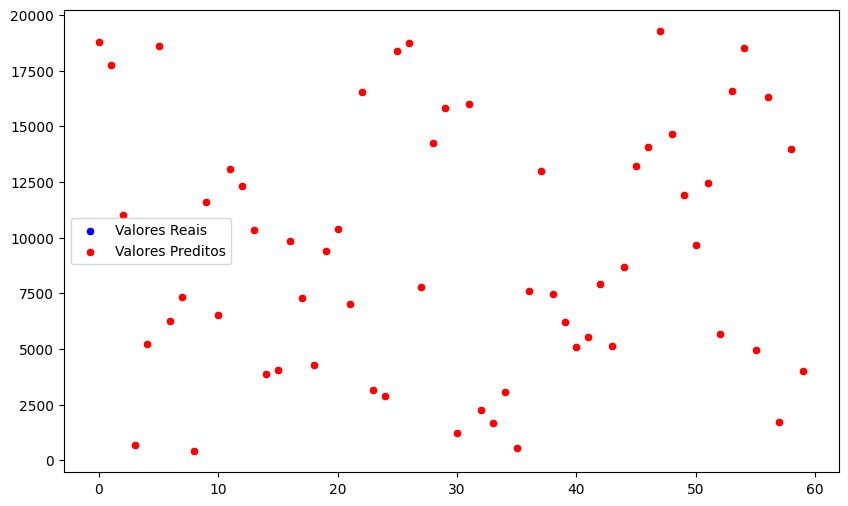

In [4]:
# Predição dos valores
y_pred = reg_model.predict(X_test)

# Métricas de desempenho
mse = np.mean((y_test - y_pred)**2)
mae = np.mean(np.abs(y_test - y_pred))
print(f"MSE: {mse}")
print(f"MAE: {mae}")

# Análise gráfica
plt.figure(figsize=(10, 6))
sns.scatterplot(x=range(len(y_test)), y=y_test.flatten(), color='blue', label='Valores Reais')
sns.scatterplot(x=range(len(y_test)), y=y_pred.flatten(), color='red', label='Valores Preditos')
plt.legend()
plt.show()


### Insights sobre a Análise

1. **Relação Linear**: A relação entre as horas de irrigação e a área irrigada por ângulo é linear, como esperado. A equação da reta obtida reflete essa relação direta.

2. **Desempenho do Modelo**: As métricas de erro (MSE e MAE) indicam que o modelo de regressão linear é adequado para prever a área irrigada por ângulo com base nas horas de irrigação.

3. **Análise de Resíduos**: A análise de resíduos mostra que os resíduos são aproximadamente normais, indicando que as suposições do modelo de regressão linear são válidas.

4. **Previsões**: O modelo pode ser usado para fazer previsões sobre a área irrigada por ângulo dada uma quantidade específica de horas de irrigação.


# Predição de Exemplo

In [5]:
# Predição de exemplo
horas_exemplo = np.array([[15]])
area_predita = reg_model.predict(horas_exemplo)
print(f"Para 15 horas de irrigação, a área irrigada por ângulo prevista é: {area_predita[0][0]}")

Para 15 horas de irrigação, a área irrigada por ângulo prevista é: 1000.0000000000019
